# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mocimboa
Processing Record 2 of Set 1 | okondja
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | keflavik
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | isafjordur
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | namibe
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | nadym
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | bajil
Processing Record 18 of Set 1 | phon charoen
Processing Record 19 of Set 1 | wynyard
Processing Record 20 of Set 1 | kavieng
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 of Set 1 | bethel
Processing Record 23 of Set 1 | iqaluit
Proc

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mocimboa,-11.3167,40.3500,31.04,46,9,4.67,MZ,1727426432
1,okondja,-0.6549,13.6753,25.00,88,99,1.64,GA,1727426433
2,papatowai,-46.5619,169.4708,6.58,79,99,5.08,NZ,1727426435
3,bilibino,68.0546,166.4372,-5.00,88,86,0.71,RU,1727426436
4,keflavik,64.0049,-22.5624,5.24,87,0,1.54,IS,1727426437


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mocimboa,-11.3167,40.3500,31.04,46,9,4.67,MZ,1727426432
1,okondja,-0.6549,13.6753,25.00,88,99,1.64,GA,1727426433
2,papatowai,-46.5619,169.4708,6.58,79,99,5.08,NZ,1727426435
3,bilibino,68.0546,166.4372,-5.00,88,86,0.71,RU,1727426436
4,keflavik,64.0049,-22.5624,5.24,87,0,1.54,IS,1727426437


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

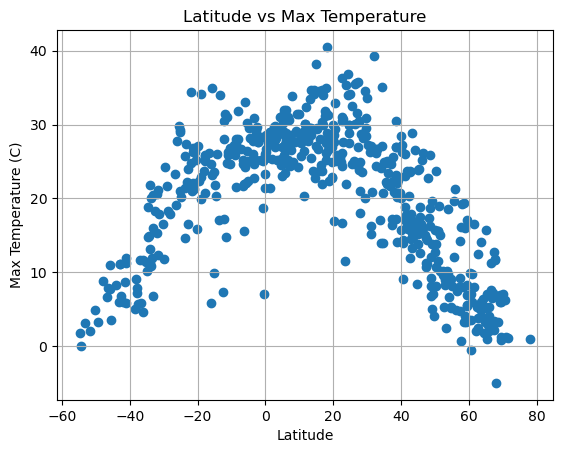

In [20]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"Latitude vs Max Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

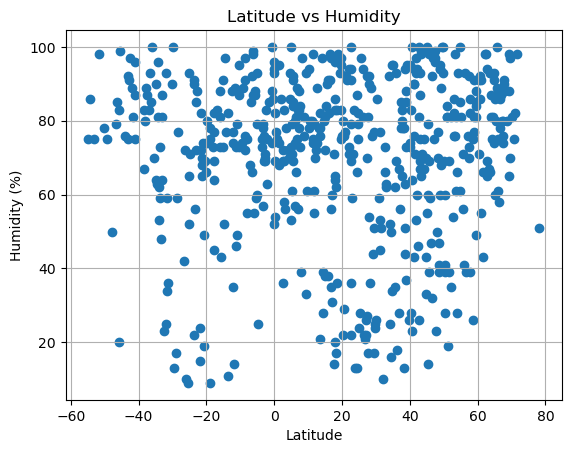

In [23]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude vs Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

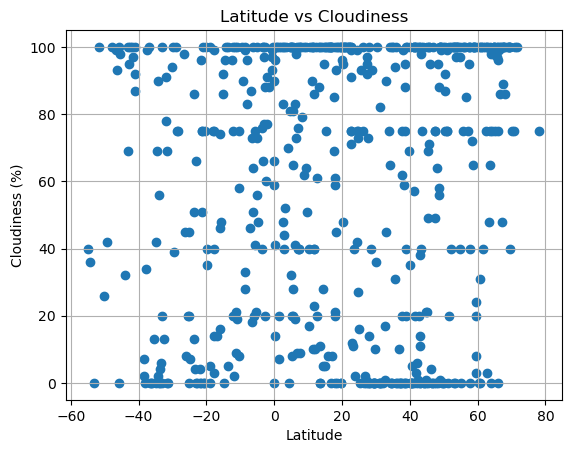

In [26]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Latitude vs Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

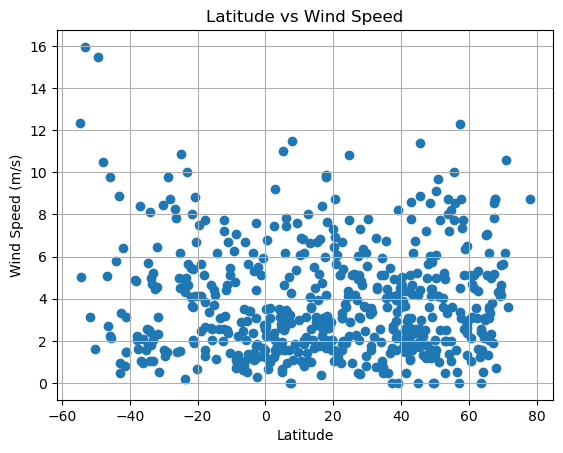

In [29]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"Latitude vs Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
def linear_regression(x, y, name, ylabel, hemi):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x* slope + intercept
    plt.plot(x, regress_values, color="r")
    plt.scatter(x,y)
    plt.title(f"Latitude vs. {ylabel}: {hemi}")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    line_formula = f"y = {(round(slope,2))}x + {(round(intercept,2))}"
    print(f"Linear equation: {line_formula}")
    plt.savefig(f"output_data/LinearRegresion_{name}.png")
    print(f"The r-value is: {rvalue}")

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,bilibino,68.0546,166.4372,-5.00,88,86,0.71,RU,1727426436
4,keflavik,64.0049,-22.5624,5.24,87,0,1.54,IS,1727426437
5,albany,42.6001,-73.9662,15.85,81,100,1.13,US,1727426350
7,isafjordur,66.0755,-23.1240,4.02,75,100,6.17,IS,1727426441
11,nadym,65.5333,72.5167,7.09,80,99,7.07,RU,1727426447


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mocimboa,-11.3167,40.3500,31.04,46,9,4.67,MZ,1727426432
1,okondja,-0.6549,13.6753,25.00,88,99,1.64,GA,1727426433
2,papatowai,-46.5619,169.4708,6.58,79,99,5.08,NZ,1727426435
6,port alfred,-33.5906,26.8910,20.10,73,4,1.79,ZA,1727426440
8,avarua,-21.2078,-159.7750,22.03,68,75,2.06,CK,1727426443


###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -0.4x + 34.04
The r-value is: -0.8311966432515601


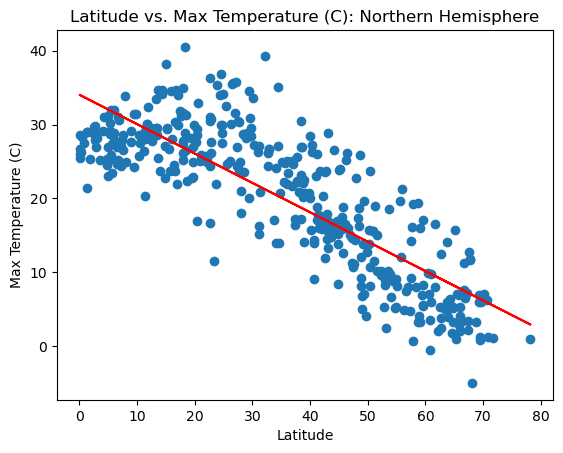

In [39]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],"north_lats_maxtemp", "Max Temperature (C)","Northern Hemisphere")
plt.show()

Linear equation: y = 0.45x + 29.56
The r-value is: 0.7594521221754114


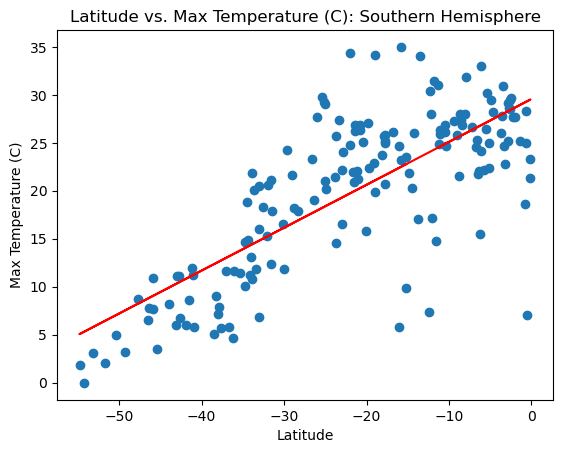

In [40]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],"south_lats_maxtemp", "Max Temperature (C)","Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** It appears that the further from the equator (i.e. 0) the colder the temperature becomes for both hemispheres. The Northern Hemisphere has a negative correlation as the linear regression plot gradient decreases as X increases, and the Southern hemisphere has a positive correlation as the temperature on average increases with higher X values.

### Humidity vs. Latitude Linear Regression Plot

Linear equation: y = 0.09x + 66.8
The r-value is: 0.07801729171287741


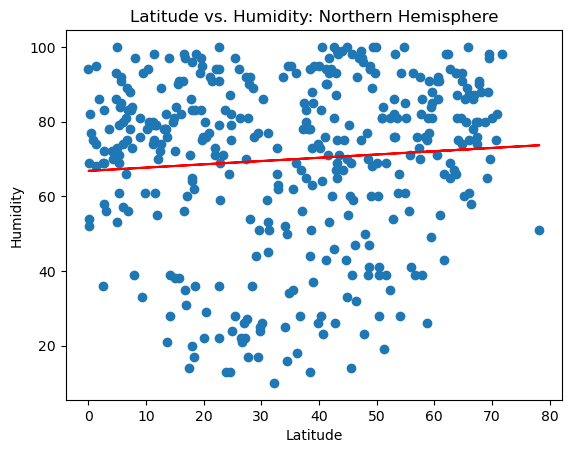

In [45]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],"north_lats_humidity", "Humidity","Northern Hemisphere")
plt.show()

Linear equation: y = 0.01x + 70.87
The r-value is: 0.005324122502611058


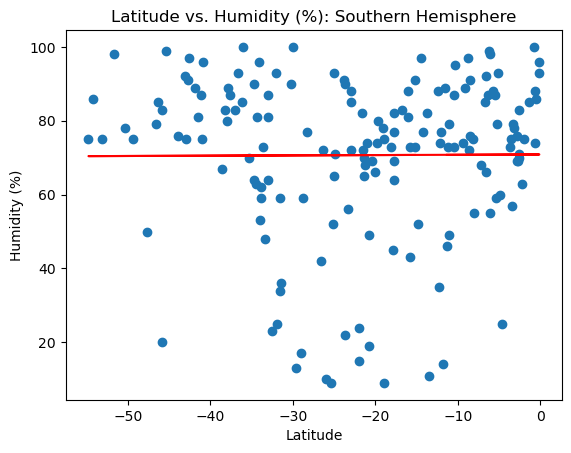

In [47]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],"south_lats_humidity", "Humidity (%)","Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** There does not appear to be a strong correlation between the two axes, meaning there is not necessarily any relationship between latitude and humidity. The scatter plot is fairly spread out which further reinforces the non-correlation.

### Cloudiness vs. Latitude Linear Regression Plot

Linear equation: y = 0.2x + 53.14
The r-value is: 0.09834155466339053


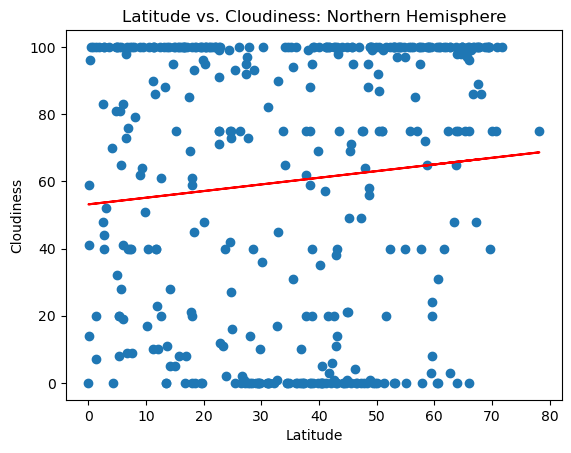

In [51]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],"north_lats_cloudiness", "Cloudiness","Northern Hemisphere")
plt.show()

Linear equation: y = 0.43x + 64.49
The r-value is: 0.16061072355329578


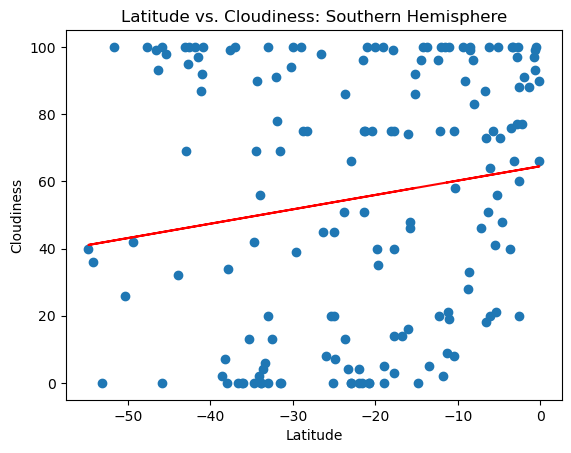

In [53]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],"southern_lats_cloudiness", "Cloudiness","Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** There does not appear to be a strong correlation between the two axes, meaning there is not necessarily any relationship between latitude and cloudiness. There are multiple cities showing 100% or 0% regardless of Latitude which also indicates that there is no strong correlation between the two axes.

### Wind Speed vs. Latitude Linear Regression Plot

Linear equation: y = 0.01x + 3.31
The r-value is: 0.10691513662924074


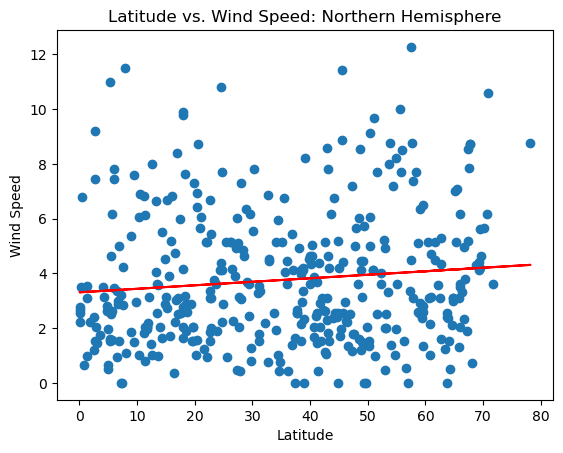

In [57]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],"north_lats_windspeed", "Wind Speed","Northern Hemisphere")
plt.show()

Linear equation: y = -0.05x + 2.9
The r-value is: -0.24484646847560845


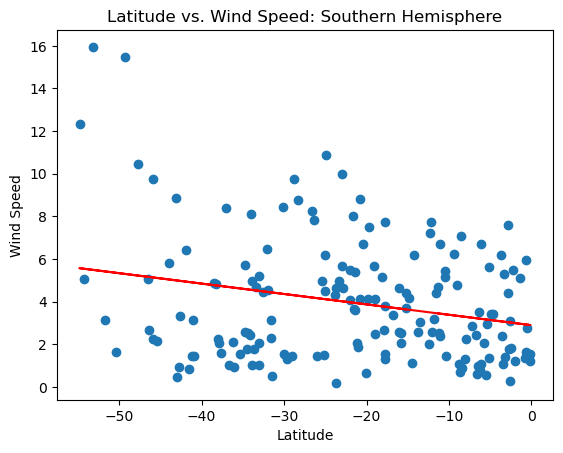

In [59]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],"south_lats_windspeed", "Wind Speed","Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** Although there does not appear to be a strong correlation between the axes, the Northern Hemisphere has a slight positive correlation while the Southern Hemisphere has a slight negative correlation. As opposed to the previous graphs displayed, the data points here appear to be much closer to the line of linear regression.